In [13]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm

In [2]:
path = '../data/genes/'
os.chdir(path)
files = glob.glob('*.csv')
print(files)

['EX5261.csv', 'EX5342.csv', 'EX5347.csv', 'EX5348.csv', 'EX5349.csv', 'EX5364.csv', 'EX5365.csv', 'EX5428.csv', 'EX5429.csv', 'EX5431.csv', 'EX5432.csv', 'EX5433.csv', 'EX5434.csv', 'EX5435.csv', 'EX5436.csv', 'EX5437.csv', 'EX5438.csv', 'EX5441.csv', 'EX5443.csv', 'EX5445.csv', 'EX5526.csv', 'EX5527.csv', 'EX5528.csv', 'EX5529.csv', 'EX5530.csv', 'EX5531.csv', 'EX5533.csv', 'EX5539.csv', 'EX5540.csv', 'EX5541.csv', 'EX5542.csv', 'EX5544.csv', 'EX5545.csv', 'EX5555.csv']


In [3]:
# function to isolate no. of mutations
def mut_count(file, chr_list):

    # created the dataframe
    df = pd.read_csv(file, low_memory=False)
    df = df.iloc[:, 77]  # only the chr column
    name = file[:-4]     # name of the input file

     
    chr_count = []
    chr_values = df.value_counts()
    chr_names = df.unique().tolist()

    # counts no. of mutation in each chr
    for gene in chr_list:
        if gene in chr_names:
            chr_count.append(chr_values[gene])
        else:
            chr_count.append(0)

    # creates the mutation count dataframe
    dic = {'Chromosome': chr_list, name: chr_count}
    df_chr = pd.DataFrame.from_dict(dic)

    return(df_chr)

In [10]:
df = pd.read_csv(files[0])
chr_names_list = df.iloc[:, 77].unique().tolist()

# start col
result = mut_count(files[0], chr_names_list)

#merging results
for file in tqdm(files[1:]):
    tmp = mut_count(file, chr_names_list)
    result = pd.concat([result, tmp.iloc[:,1]], axis=1)
    
df.to_csv('mut_count_all.csv', index=False)
result 

  0%|          | 0/33 [00:00<?, ?it/s]

,Chromosome,EX5261,EX5342,EX5347,EX5348,EX5349,EX5364,EX5365,EX5428,EX5429,...,EX5530,EX5531,EX5533,EX5539,EX5540,EX5541,EX5542,EX5544,EX5545,EX5555
0,chr1,11664,12902,13262,13177,13061,12320,12924,15688,14857,...,3493,3459,3661,3554,3569,3547,3387,3365,3550,3432
1,chr2,9156,9377,9419,9905,10536,9247,9848,11934,11323,...,2462,2507,2372,2425,2508,2435,2227,2518,2540,2402
2,chr3,7016,6932,7360,7314,7703,7160,7144,8790,7617,...,2039,2109,2141,2169,2184,2083,2102,1988,2107,2206
3,chr4,5267,5285,5472,5733,5821,5290,5824,7064,6577,...,1394,1475,1453,1437,1465,1484,1489,1408,1499,1435
4,chr5,5556,5699,5741,6191,6261,5762,6002,7124,6408,...,1541,1541,1552,1600,1583,1573,1542,1565,1542,1556
5,chr6,5723,5666,5924,5851,6226,6053,5950,7464,6556,...,2494,2466,2424,2396,2502,2347,2368,2150,2292,2460
6,chr7,6346,7339,7741,7677,7695,7298,7904,8702,7577,...,1770,1768,1862,1818,1835,1820,1770,1820,1812,1799
7,chr8,4580,4531,4981,5052,5097,4470,4685,5667,5095,...,1268,1233,1209,1193,1235,1182,1220,1260,1224,1207
8,chr9,4751,5296,5523,5432,5545,5513,5720,6418,5788,...,1446,1217,1335,1410,1310,1397,1379,1379,1414,1405
9,chr10,5463,5932,5998,6276,6365,5759,6047,7316,6629,...,1630,1555,1557,1566,1607,1656,1508,1560,1540,1549


In [47]:
#result.iloc[:,1:].mean().mean()
result.iloc[:,1:].max().max()

15918

In [49]:
res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()

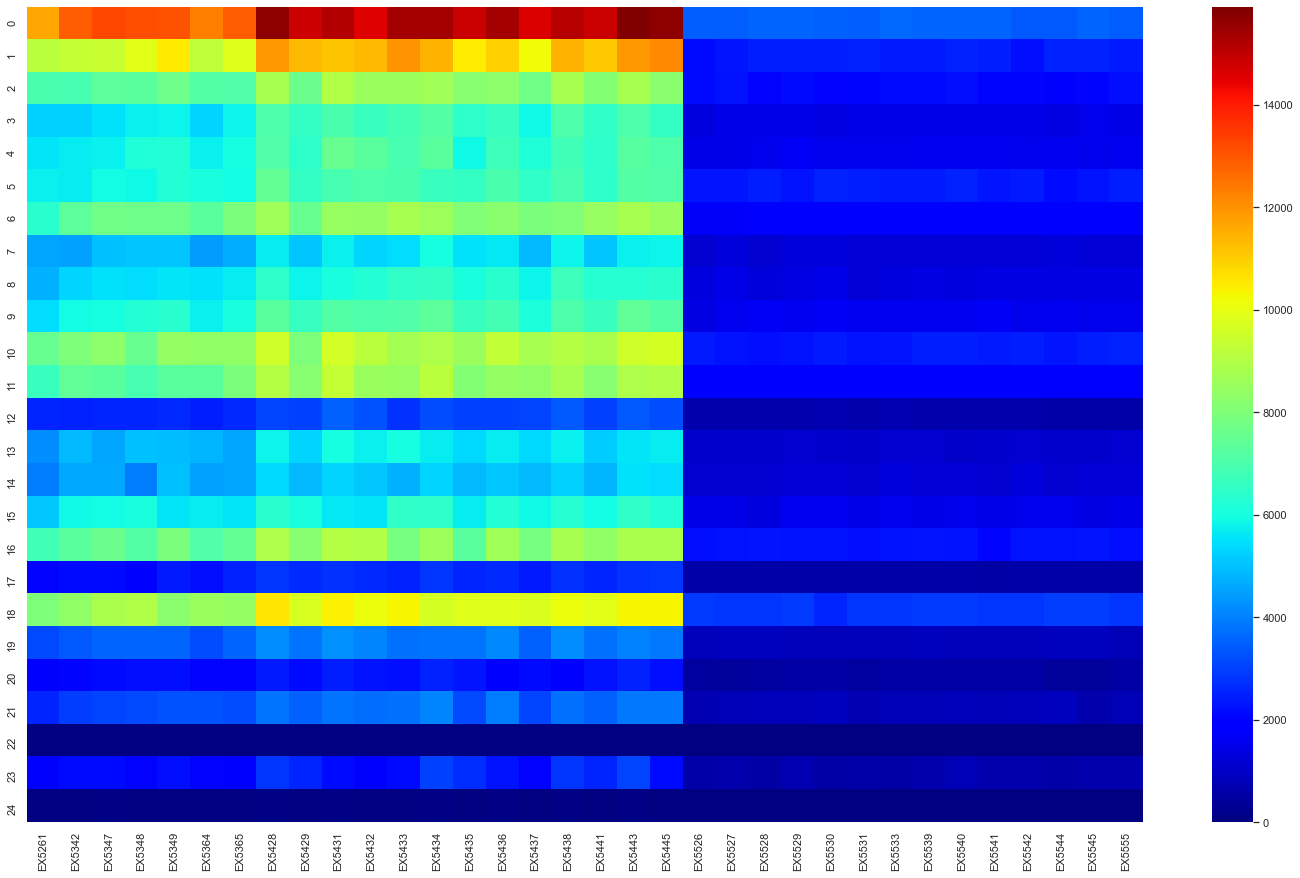

In [51]:

sns.set(rc={'figure.figsize':(25,15)})

ax = sns.heatmap(result.iloc[:,1:], cmap='jet')
#res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()
#ax = sns.heatmap(res_norm, cmap='jet')

In [30]:
fig = px.imshow(result.iloc[:,1:])
fig.show()

In [ ]:
for file in files:
    new_file = file.replace('.merged', '')
    os.rename(file, new_file)